In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from imgaug import augmenters as iaa
from skimage.io import imread,imshow
import matplotlib.pyplot as plt

In [4]:
# !pip3 install keras==2.2.4 

In [5]:
x=[]
y=[]
path = 'C:/Users/Bermuda/Desktop/Hi!_Project4D/Project4D/Source Code/MLlane/dataset'
for fname in os.listdir(path):    
    paths=path+'/'+str(fname)
    for i in os.listdir(paths):
        pathss = paths+'/'+str(i)
        frame = imread(pathss)
        frame = cv2.resize(frame,(100, 70))
#         frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        y.append(fname)
        x.append(np.array(frame))  
        
x = np.array(x) 
y = np.array(y) 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=53)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(2425, 70, 100, 3)
(1040, 70, 100, 3)
(2425,)


In [6]:
base_model = MobileNetV2(input_shape=(70, 100, 3), include_top=False, weights='imagenet')

base = Flatten()(base_model.output)
base = Dense(256, activation='sigmoid')(x)
base = Dense(256, activation='sigmoid')(x)
base = Dense(2, activation='softmax')(x)

C:\Users\Bermuda\AppData\Roaming\Python\Python36\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [10]:
model = Model([base_model.input], [base])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.save_weights('weightsMobileNetV2New3.h5py')

In [11]:
num_classes = 2
batch_size=24
epochs=10

In [35]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 1940 samples, validate on 485 samples
Epoch 1/10
1940/1940 [==============================] - 441s 227ms/step - loss: 0.4861 - acc: 0.8402 - val_loss: 0.2253 - val_acc: 0.9691
Epoch 2/10
1940/1940 [==============================] - 488s 252ms/step - loss: 0.1206 - acc: 0.9948 - val_loss: 0.0539 - val_acc: 0.9979
Epoch 3/10
1940/1940 [==============================] - 489s 252ms/step - loss: 0.0444 - acc: 0.9985 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 4/10
1940/1940 [==============================] - 33025s 17s/step - loss: 0.0265 - acc: 0.9990 - val_loss: 0.0155 - val_acc: 1.0000
Epoch 5/10
1940/1940 [==============================] - 715s 368ms/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 6/10
1940/1940 [==============================] - 690s 356ms/step - loss: 0.0130 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 7/10
1940/1940 [==============================] - 690s 356ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.0080 - val

In [16]:
model.save('my_mobilev2_3.h5')

In [1]:
from keras.models import load_model
model = load_model('my_mobilev2_3.h5')

C:\Users\Bermuda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# x=[]
# path = 'C:/Users/Bermuda/Desktop/Hi!_Project4D/Project4D/Source Code/MLlane/test/'
# pathss = path+'323.jpg'
# frame = imread(pathss)

In [35]:
def DetectPigy(frame):
    x=[]
    x.append([frame])
    Y_pred = model.predict(x)
    y_pred = np.argmax(Y_pred, axis=1)
    return y_pred
#     print(y_pred)

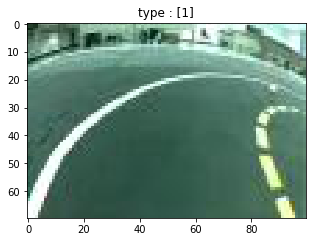

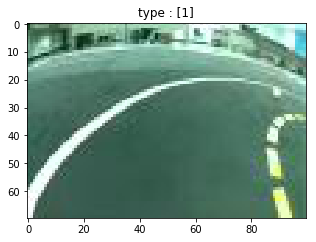

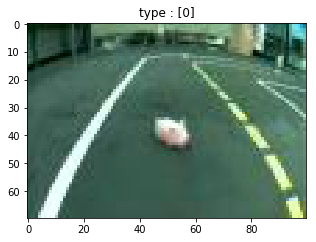

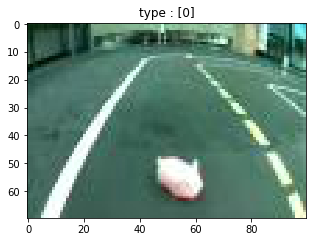

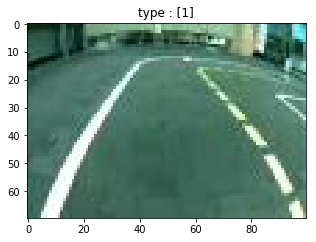

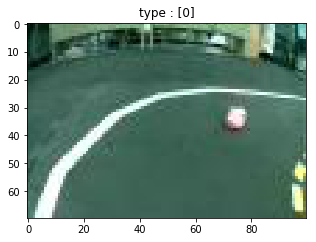

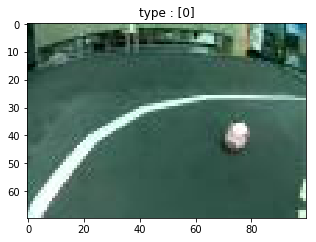

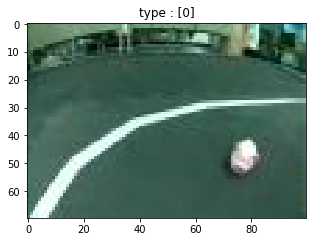

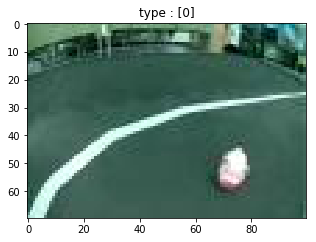

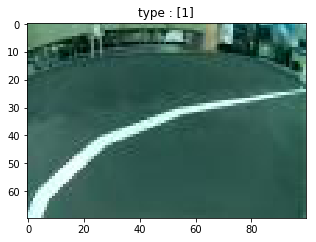

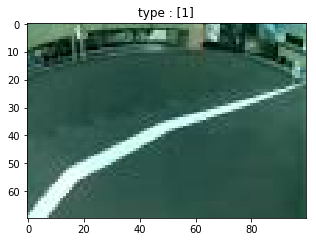

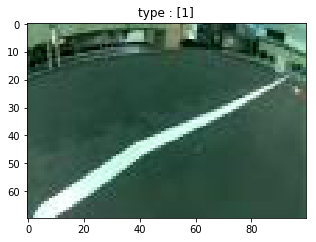

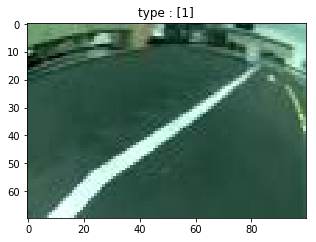

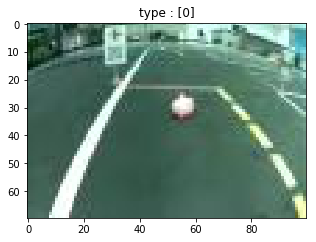

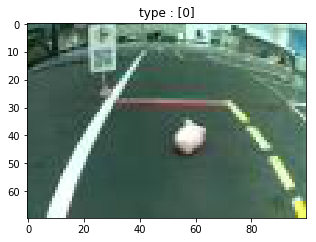

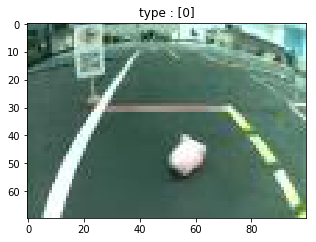

In [36]:
path = 'C:/Users/Bermuda/Desktop/Hi!_Project4D/Project4D/Source Code/MLlane/test'
for fname in os.listdir(path):    
    paths=path+'/'+str(fname)
    frame = imread(paths)     
    t = 'type : '+str(DetectPigy(frame))
    fig,ax =plt.subplots(figsize=(5,5))
    plt.title(t)
    ax.imshow(frame)

In [14]:
# loss,acc = model.evaluate(x_test,y_test)
# print("Acc = " + str(acc))
# print("Loss = " + str(loss))

In [15]:
# from sklearn.metrics import classification_report, confusion_matrix
# #Confution Matrix and Classification Report
# Y_pred = model.predict(x_test)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
# print('Classification Report')
# print(classification_report(np.argmax(y_test, axis=1), y_pred))

In [36]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print('Classification Report')
print(classification_report(np.argmax(y_test, axis=1), y_pred))


Confusion Matrix
[[502   0]
 [  0 538]]
Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       502
          1       1.00      1.00      1.00       538

avg / total       1.00      1.00      1.00      1040



In [2]:
for i in range (len(x_test)):
    t = 'image : '+str(i)+' '+str(y_test[i][1].astype('int'))+' '+str(y_pred[i])
    fig,ax =plt.subplots(figsize=(5,5))
    plt.title(t)
    ax.imshow(x_test[i])

NameError: name 'x_test' is not defined

In [1]:

y_test[0][1]

NameError: name 'y_test' is not defined